**Fruit Classification**

Total number of images: 22495.

Training set size: 16854 images (one fruit or vegetable per image).

Test set size: 5641 images (one fruit or vegetable per image).

Number of classes: 33 (fruits and vegetables).

Image size: 100x100 pixels.

For simple testing purposes only the training dataset will be used within the model with a split against training and testing (80/20). Random Forest Classification used initially. 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
import os 
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import numpy as np


np.random.seed(14)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
for dirpath, dirnames, filenames in os.walk("images"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'images'.
There are 0 directories and 0 images in 'images\classification'.
There are 1 directories and 0 images in 'images\test'.
There are 0 directories and 5641 images in 'images\test\test'.
There are 1 directories and 0 images in 'images\train'.
There are 33 directories and 0 images in 'images\train\train'.
There are 0 directories and 492 images in 'images\train\train\Apple Braeburn'.
There are 0 directories and 492 images in 'images\train\train\Apple Granny Smith'.
There are 0 directories and 492 images in 'images\train\train\Apricot'.
There are 0 directories and 427 images in 'images\train\train\Avocado'.
There are 0 directories and 490 images in 'images\train\train\Banana'.
There are 0 directories and 462 images in 'images\train\train\Blueberry'.
There are 0 directories and 490 images in 'images\train\train\Cactus fruit'.
There are 0 directories and 492 images in 'images\train\train\Cantaloupe'.
There are 0 directories and 492 images in 'im

In [4]:
train_path = "images/train/train/"
test_path = "images/test/test/"

In [5]:
data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


In [6]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

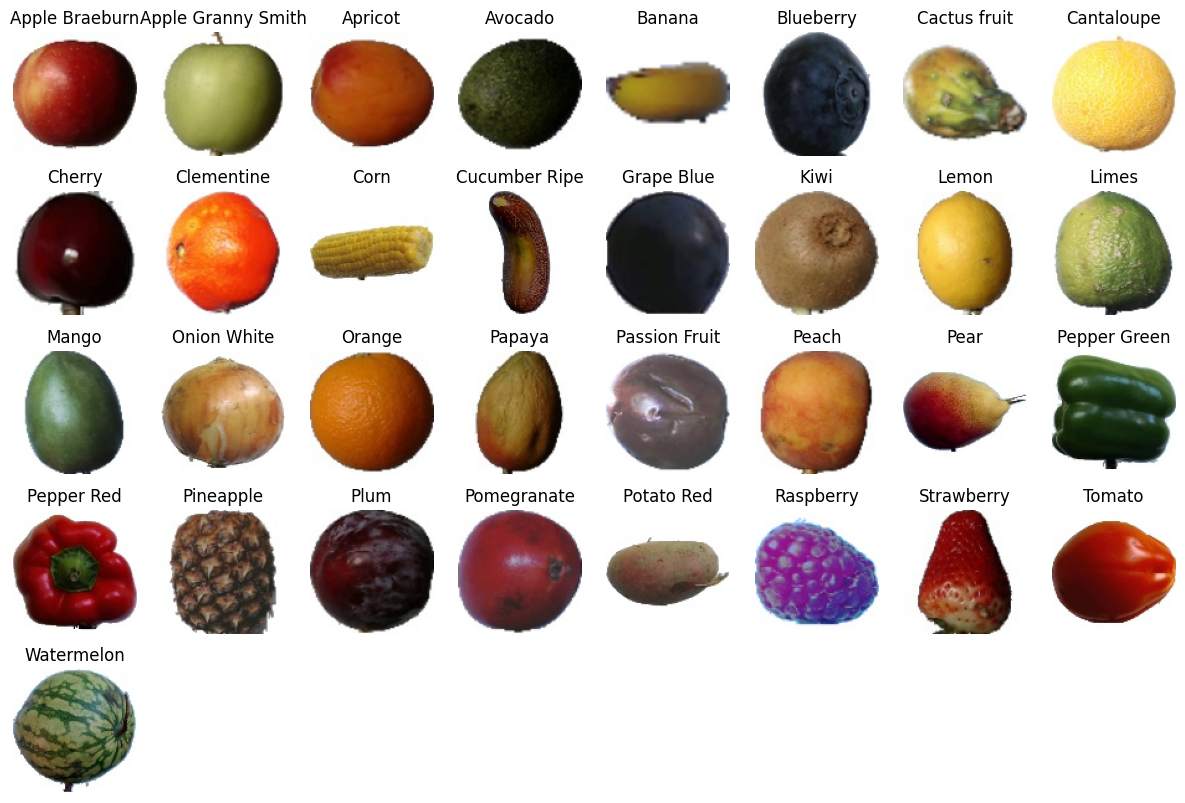

In [7]:
plt.figure(figsize = (15,10))
# View a random image from the training dataset for all classes
for i in range(33):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

In [8]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

,path,filename,label
0,images/train/train/Apple Braeburn,Apple Braeburn_0.jpg,Apple Braeburn
1,images/train/train/Apple Braeburn,Apple Braeburn_1.jpg,Apple Braeburn
2,images/train/train/Apple Braeburn,Apple Braeburn_10.jpg,Apple Braeburn
3,images/train/train/Apple Braeburn,Apple Braeburn_100.jpg,Apple Braeburn
4,images/train/train/Apple Braeburn,Apple Braeburn_101.jpg,Apple Braeburn


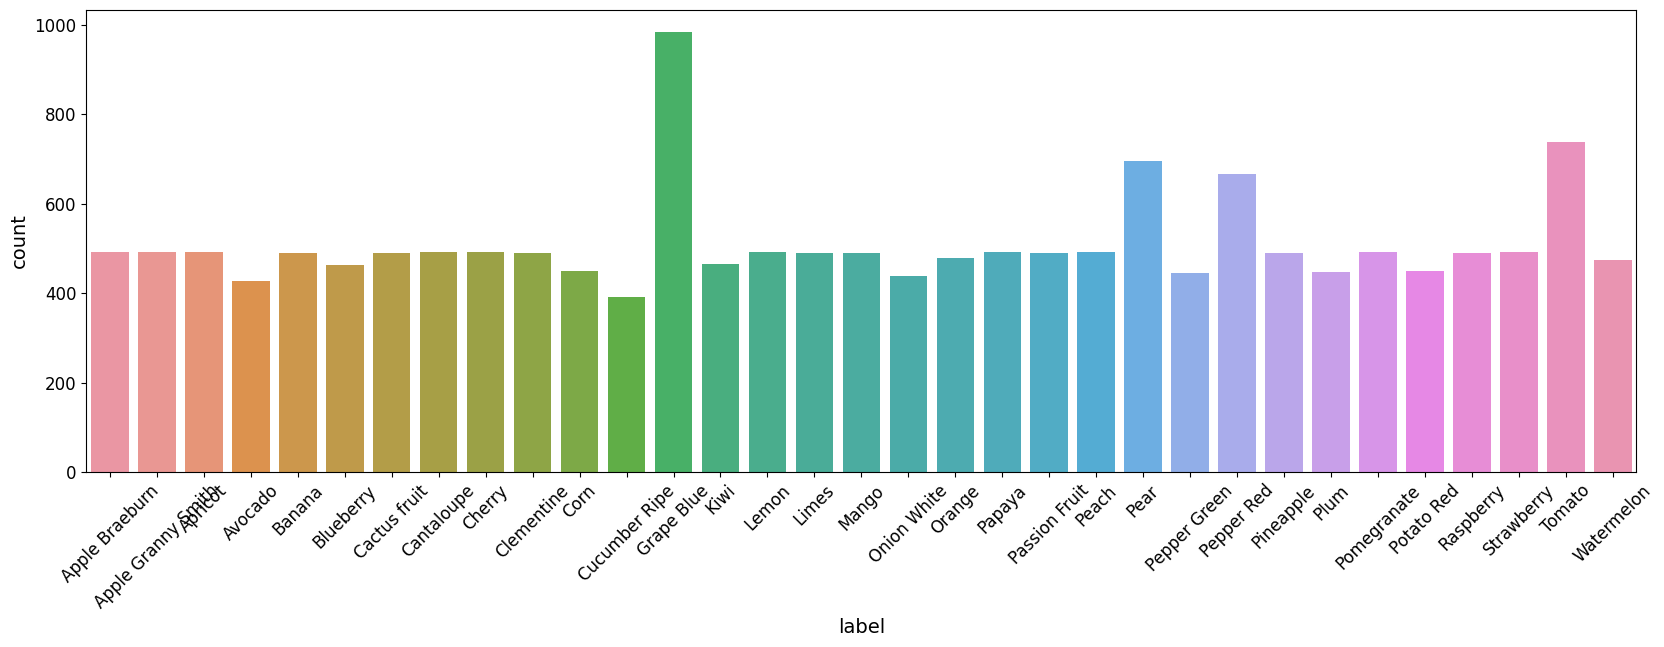

In [9]:
plt.figure(figsize = (20,6))
#data_df['label'].value_counts().plot(kind='barh')
sns_cntplot = sns.countplot(x='label', data=train_val_data_df)
plt.xticks(rotation=45);

**Create Data Arrays For Use In ML Model**


In [10]:
images = []
label = [] 

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [11]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [12]:
class_indices = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indices.get, labels))

#Convert to categorical data using tensorflow 
#labels to One-hot encoded
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')

In [13]:
print(class_indices)

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [14]:
#Split the train dataset into train, validation, test and test

train_im, test_im, train_lab, test_lab = train_test_split(images, label_categorical, test_size=0.20, 
                                                            stratify=label_categorical, 
                                                            random_state=40, shuffle = True)


In [15]:
print(train_im.shape)
print(train_lab.shape)
print(test_im.shape)
print(test_lab.shape)

(13483, 100, 100, 3)
(13483, 33)
(3371, 100, 100, 3)
(3371, 33)


In [16]:
# Normalization
train_im = train_im/255.0
test_im = test_im/255.0

In [17]:
nsamples, nx, ny, nrgb = train_im.shape
train_im = train_im.reshape((nsamples,nx*ny*nrgb))

In [18]:
nsamples, nx, ny, nrgb = test_im.shape
test_im = test_im.reshape((nsamples,nx*ny*nrgb))

In [19]:
print(train_im.shape)

(13483, 30000)


**Create Random Forrest Classifier**

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(train_im,train_lab)

In [ ]:
y_pred=model.predict(test_im)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_pred,test_lab)
print(classification_report(y_pred,test_lab))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       213
           4       0.98      1.00      0.99       239
           5       1.00      1.00      1.00       231
           6       0.98      1.00      0.99       239
           7       1.00      1.00      1.00       246
           8       1.00      1.00      1.00       246
           9       1.00      1.00      1.00       245
          10       1.00      1.00      1.00       224
          11       0.90      1.00      0.95       177
          12       1.00      1.00      1.00       492
          13       1.00      1.00      1.00       233
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       245
          16       1.00      1.00      1.00       245
          17       1.00    

c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(test_lab[1530]) 

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(y_pred[1530])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
